In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

In [2]:
# Let's read Images with mask and without mask
mask_img0 = Image.open('C:/Users/saikr/OneDrive/Desktop/Face_Mask/test/with_mask/1-with-mask.jpg')
mask_img1 = Image.open("C:/Users/saikr/OneDrive/Desktop/Face_Mask/test/with_mask/25-with-mask.jpg")
without_mask_img0 = Image.open("C:/Users/saikr/OneDrive/Desktop/Face_Mask/test/without_mask/11.jpg")


Text(0.5, 1.0, 'Without Mask')

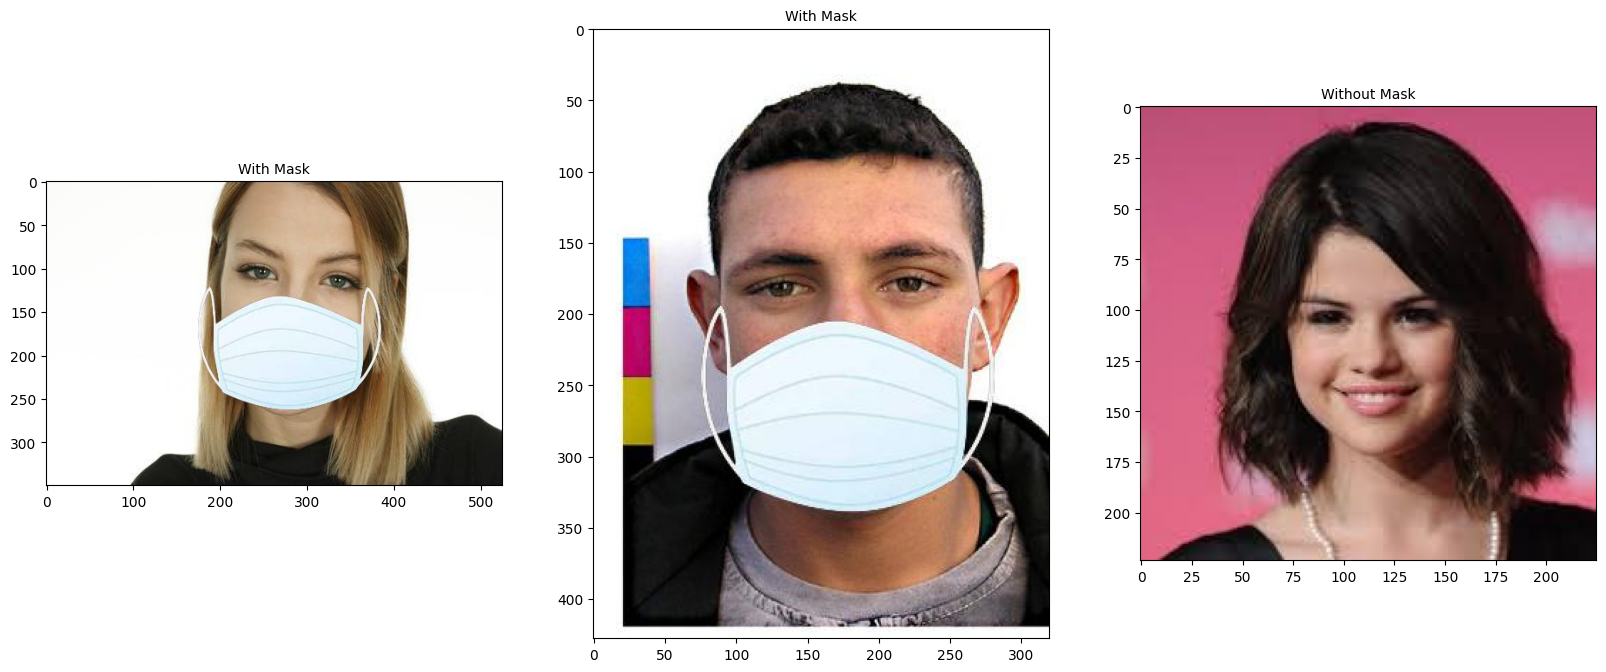

In [3]:
fig = plt.figure(figsize=(20,9))

# Add Subplotting to display multiple images
a1 = fig.add_subplot(1, 3, 1)
img_plot = plt.imshow(mask_img0)
a1.set_title("With Mask", fontsize = 10)

a2 = fig.add_subplot(1, 3, 2)
img_plot = plt.imshow(mask_img1)
a2.set_title("With Mask", fontsize = 10)

a3 = fig.add_subplot(1, 3, 3)
img_plot = plt.imshow(without_mask_img0)
a3.set_title("Without Mask", fontsize = 10)

### Image Data Augmentation
    * All RGB Image data will be used to create new samples for Training
    * New samples will transformed using Image Data Generator
    * Images will be resampled using pixel normalization (Divide each pixel by 255), Shear Range, Zoom, Brightness etc.

In [4]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from numpy import expand_dims

In [5]:
img = load_img("C:\\Users\\saikr\\OneDrive\\Desktop\\Face_Mask\\train\\with_mask\\2ca869fa7b11fae2a0b15e83c318a164.jpg")

In [6]:
data = img_to_array(img)
# axis = 0, rowwise , axis = 1 (columnwise)
samples = expand_dims(data, axis = 0)

In [7]:
# (1, 428, 320, 3) = Num of images, shape of image = (428,320,3)
samples.shape

(1, 1500, 1000, 3)

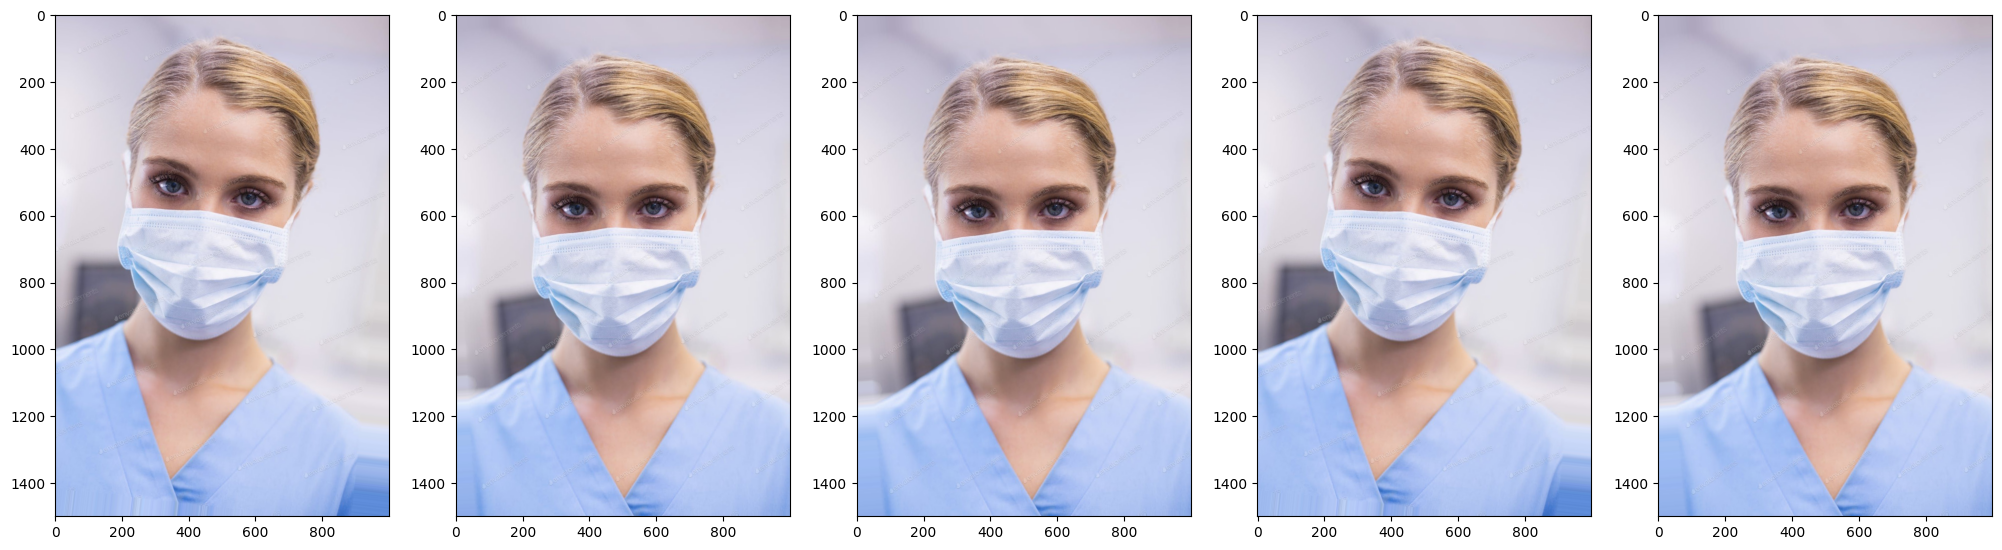

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
# Rotation of Image
datagen = ImageDataGenerator(rotation_range = 10, fill_mode='nearest')
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1,5, figsize = (25, 10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show() 

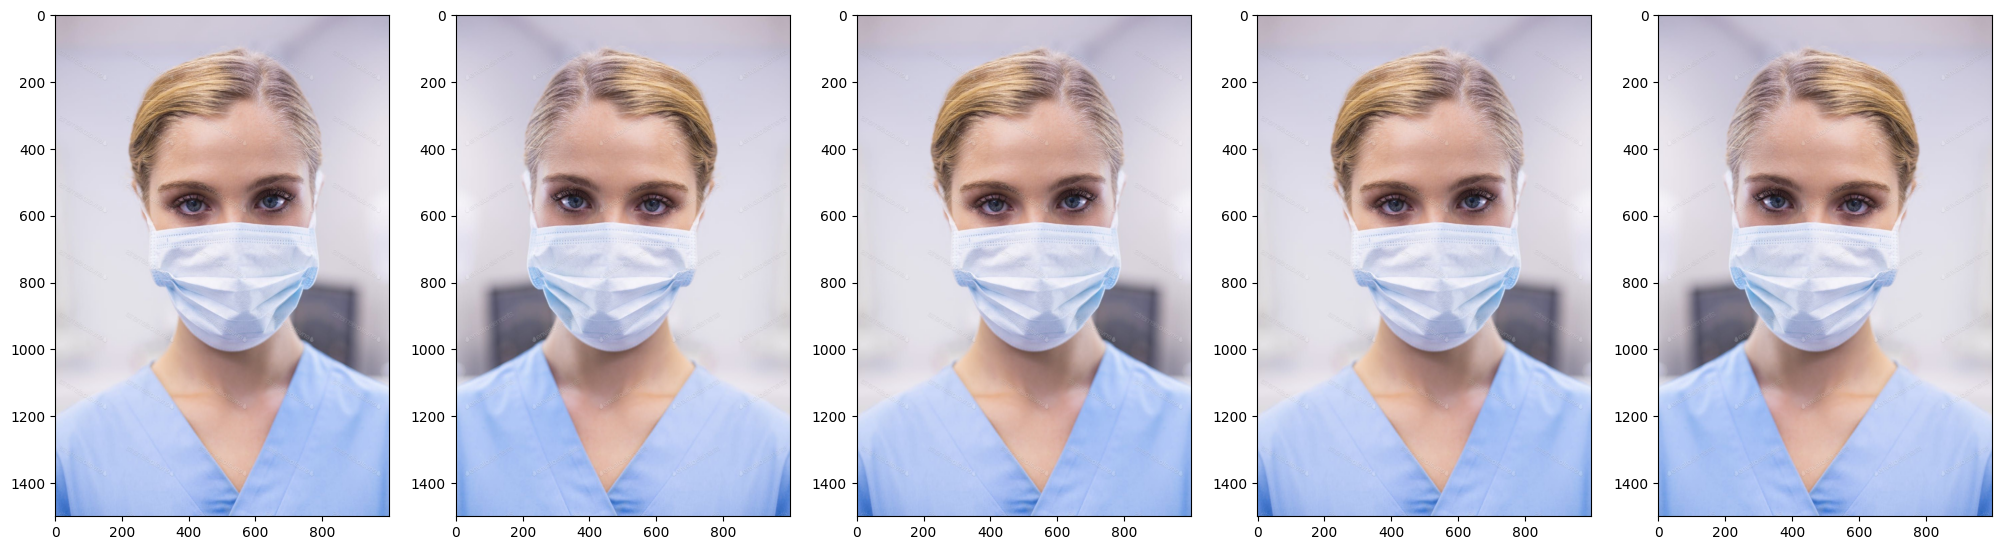

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
# Horizontal Flip of Image Data
datagen = ImageDataGenerator(horizontal_flip = True, fill_mode='nearest')
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1,5, figsize = (25, 10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show() 

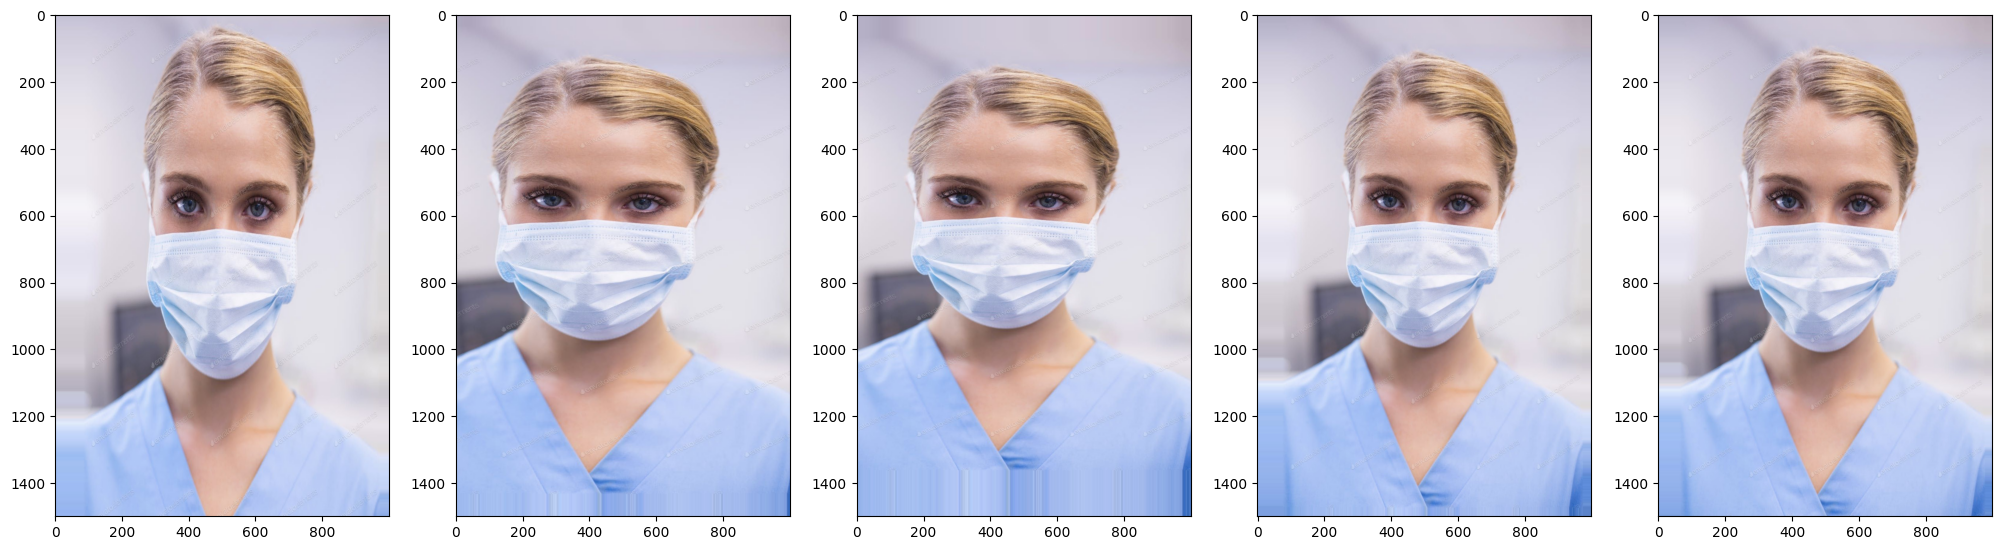

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
# Zoom Range Transformation of Image Data
datagen = ImageDataGenerator(zoom_range = 0.2, fill_mode='nearest')
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1,5, figsize = (25, 10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show() 

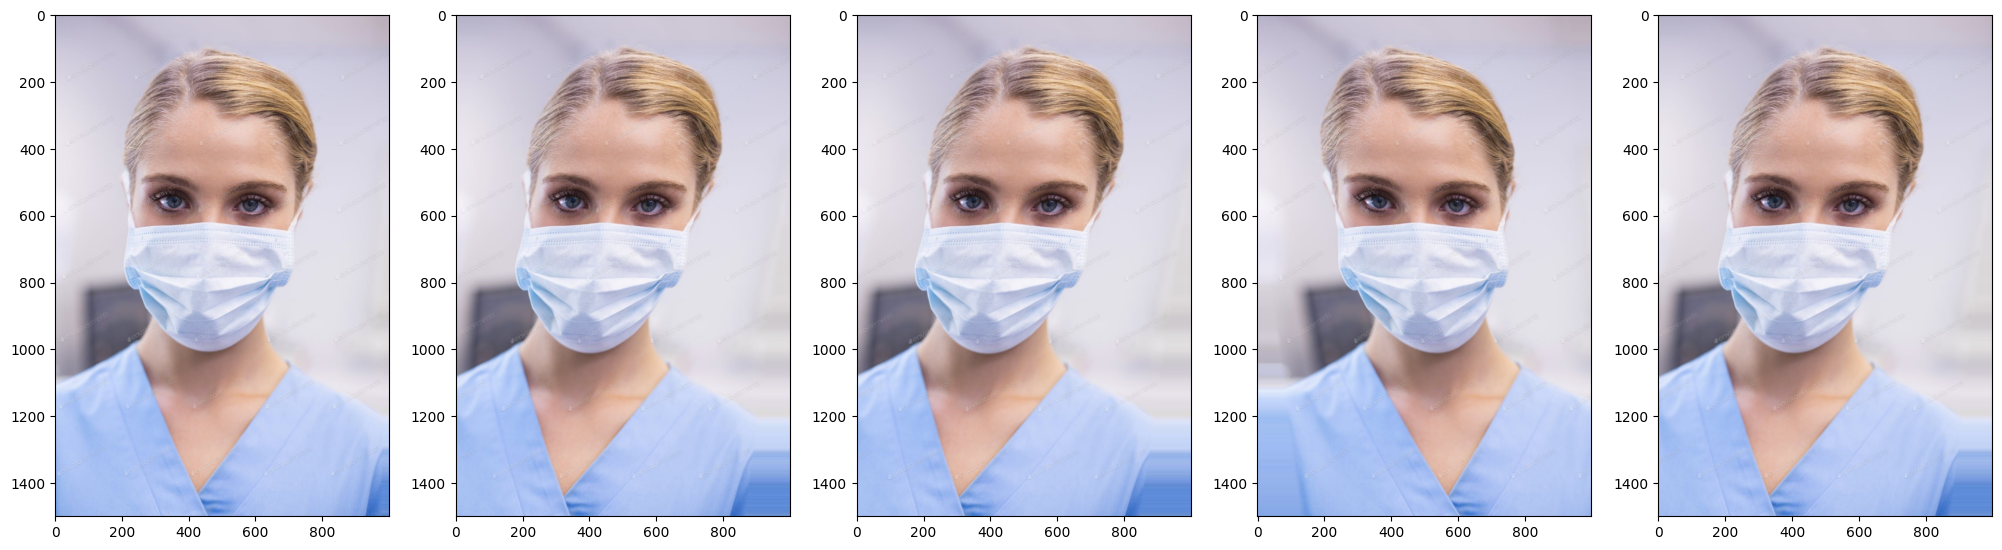

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
# Shear Transformation of Image Data
datagen = ImageDataGenerator(shear_range = 10, fill_mode='nearest')
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1,5, figsize = (25, 10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

In [12]:
# Image Transformation , Image Pixel Normalization (0,1)
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=10, zoom_range=0.2, shear_range=10, horizontal_flip=True,
                                  fill_mode='nearest')
# Test Data Generator
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# alternative class_mode = 'categorical'
training_set = train_datagen.flow_from_directory("C:\\Users\\saikr\\OneDrive\\Desktop\\Face_Mask\\train", 
                                                 target_size=(150,150), batch_size=16, 
                                                 class_mode='binary')

test_set = train_datagen.flow_from_directory("C:\\Users\\saikr\\OneDrive\\Desktop\\Face_Mask\\test", 
                                                 target_size=(150,150), batch_size=16, 
                                                 class_mode='binary')

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [14]:
training_set.image_shape

(150, 150, 3)

In [15]:
test_set.image_shape

(150, 150, 3)

#### CNN Model

In [16]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [17]:
def build_model():
    # FeedForward NN
    model = Sequential()
    # Input Layer
    # filters = Similar to number of Neurons, kernel_size = (3,3), strides = (1,1), padding = 'same'(zero padding), activation = 'relu'
    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu',
                    input_shape = (150,150,3)))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Conv2D - II
    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Conv2D - III
    model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    # MaxPooling
    model.add(MaxPooling2D())
    
    # Flatten Layer
    model.add(Flatten())
    
    # Fully Connected Layer
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    # Optimizers
    optimizers = Adam(learning_rate = 0.0001)
    
    # Model Compiler
    model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
    
    return model

In [18]:
model = build_model()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [20]:
# save best model
from tensorflow.keras import callbacks
filepath = "C:\\Users\\saikr\\OneDrive\\Desktop\\Face_Mask"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', save_best_model = True, mode = 'min', verbose = 1)
checkpoint

In [21]:
history = model.fit(training_set, validation_data = test_set, epochs=20, callbacks = [checkpoint], verbose = 1)

Epoch 1/20
83/83 [==============================] - ETA: 0s - loss: 0.5925 - accuracy: 0.7024
Epoch 1: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 59s 678ms/step - loss: 0.5925 - accuracy: 0.7024 - val_loss: 0.3206 - val_accuracy: 0.9227
Epoch 2/20
83/83 [==============================] - ETA: 0s - loss: 0.2277 - accuracy: 0.9132
Epoch 2: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 37s 440ms/step - loss: 0.2277 - accuracy: 0.9132 - val_loss: 0.1476 - val_accuracy: 0.9588
Epoch 3/20
83/83 [==============================] - ETA: 0s - loss: 0.1330 - accuracy: 0.9536
Epoch 3: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 53s 640ms/step - loss: 0.1330 - accuracy: 0.9536 - val_loss: 0.1444 - val_accuracy: 0.9485
Epoch 4/20
83/83 [==============================] - ETA: 0s - loss: 0.1221 - accuracy: 0.9521
Epoch 4: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 59s 703ms/step - loss: 0.1221 - accuracy: 0.9521 - val_loss: 0.1078 - val_accuracy: 0.9588
Epoch 5/20
83/83 [==============================] - ETA: 0s - loss: 0.0940 - accuracy: 0.9642
Epoch 5: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 56s 673ms/step - loss: 0.0940 - accuracy: 0.9642 - val_loss: 0.1631 - val_accuracy: 0.9381
Epoch 6/20
83/83 [==============================] - ETA: 0s - loss: 0.1126 - accuracy: 0.9627
Epoch 6: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 55s 662ms/step - loss: 0.1126 - accuracy: 0.9627 - val_loss: 0.1156 - val_accuracy: 0.9639
Epoch 7/20
83/83 [==============================] - ETA: 0s - loss: 0.0845 - accuracy: 0.9688
Epoch 7: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 55s 658ms/step - loss: 0.0845 - accuracy: 0.9688 - val_loss: 0.1147 - val_accuracy: 0.9691
Epoch 8/20
83/83 [==============================] - ETA: 0s - loss: 0.0779 - accuracy: 0.9711
Epoch 8: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 56s 672ms/step - loss: 0.0779 - accuracy: 0.9711 - val_loss: 0.1523 - val_accuracy: 0.9485
Epoch 9/20
83/83 [==============================] - ETA: 0s - loss: 0.0792 - accuracy: 0.9726
Epoch 9: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 55s 659ms/step - loss: 0.0792 - accuracy: 0.9726 - val_loss: 0.1019 - val_accuracy: 0.9639
Epoch 10/20
83/83 [==============================] - ETA: 0s - loss: 0.0789 - accuracy: 0.9749
Epoch 10: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 56s 672ms/step - loss: 0.0789 - accuracy: 0.9749 - val_loss: 0.1176 - val_accuracy: 0.9639
Epoch 11/20
83/83 [==============================] - ETA: 0s - loss: 0.0621 - accuracy: 0.9802
Epoch 11: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 52s 628ms/step - loss: 0.0621 - accuracy: 0.9802 - val_loss: 0.1082 - val_accuracy: 0.9536
Epoch 12/20
83/83 [==============================] - ETA: 0s - loss: 0.0672 - accuracy: 0.9779
Epoch 12: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 45s 541ms/step - loss: 0.0672 - accuracy: 0.9779 - val_loss: 0.1442 - val_accuracy: 0.9485
Epoch 13/20
83/83 [==============================] - ETA: 0s - loss: 0.0597 - accuracy: 0.9833
Epoch 13: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 56s 672ms/step - loss: 0.0597 - accuracy: 0.9833 - val_loss: 0.1109 - val_accuracy: 0.9742
Epoch 14/20
83/83 [==============================] - ETA: 0s - loss: 0.0611 - accuracy: 0.9779
Epoch 14: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 54s 648ms/step - loss: 0.0611 - accuracy: 0.9779 - val_loss: 0.1242 - val_accuracy: 0.9536
Epoch 15/20
83/83 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.9779
Epoch 15: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 56s 671ms/step - loss: 0.0593 - accuracy: 0.9779 - val_loss: 0.1029 - val_accuracy: 0.9742
Epoch 16/20
83/83 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9795
Epoch 16: saving model to C:\Users\saikr\OneDrive\Desktop\Face_Mask


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


INFO:tensorflow:Assets written to: C:\Users\saikr\OneDrive\Desktop\Face_Mask\assets


83/83 [==============================] - 51s 609ms/step - loss: 0.0508 - accuracy: 0.9795 - val_loss: 0.0891 - val_accuracy: 0.9639
Epoch 17/20
77/83 [==========================>...] - ETA: 3s - loss: 0.0648 - accuracy: 0.9754

#### CNN Performance Metrics

In [ ]:
pd.DataFrame(history.history)

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
pd.DataFrame(history.history)[['loss','val_loss']].plot()

#### Best Model 

In [ ]:
model.load_weights("C:\\Users\\saikr\\OneDrive\\Desktop\\Face_Mask\\Mask_BestModel.hdf5")

In [ ]:
predictions = model.predict(test_set)

In [ ]:
yhat = np.round(predictions)

In [ ]:
model.evaluate(test_set)

In [ ]:
test_set.class_indices

In [ ]:
test_set.classes

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(test_set.classes, yhat)

In [ ]:
from tensorflow.keras.preprocessing import image
#import datetime
# Using pre-saved model into the new model (No need to re-train model)
model.load_weights("C:\\Users\\saikr\\OneDrive\\Desktop\\Face_Mask\\Mask_BestModel.hdf5")

color_dict={0:(0,255,0), 1:(0,0,255)}

cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier("C:\\Users\\saikr\\Downloads\\haarcascade_frontalface_default.xml")
while cap.isOpened():
    _,img = cap.read()
    face=face_cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=5)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        # These are transformation of image to satify the model input image
        test_image=image.load_img('temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis = 0)
        # predict
        pred = model.predict(test_image)[0][0]
        print(pred)
        if pred == 1:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'NO MASK',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'MASK',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
    
    cv2.imshow('img', img)
    
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()